# Problem Statement - I

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

They want to analyze the factors influencing the demand for shared bikes. More specifically, they seek insights into the factors impacting the demand for these shared bikes in the American market. The company aims to ascertain:

-  The significance of variables in predicting the demand for shared bikes.
-  The effectiveness of those variables in describing the dynamics of bike demand.

## Business Objectives

We need to create a model that predicts the demand for shared bikes based on the given independent variables. The management intends to use this model to discern how demand fluctuates with various features. By doing so, they can adjust the business strategy to align with demand levels and meet customer expectations. Additionally, the model serves as a valuable tool for the management to grasp the demand dynamics in a new market.

In [1]:
# Import libraries



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

#### Reading the Dataset

In [2]:
data = pd.read_csv("day.csv")

In [3]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
data.shape

(730, 16)

In [5]:
data.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Check Missing Values

In [7]:
# Funcion to get null value

def null_percentage(df):
    output = round(df.isnull().sum()/len(df.index)*100,2)
    return output

In [8]:
# Missing values of all columns

Na_col = null_percentage(data)
Na_col

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#### No missing values found

#### check duplicate values

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.shape

(730, 16)

#### No duplicates found in data sets

In [11]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Data Understanding

	- instant: record index (can be dropped)
	- dteday : date (this infromation is covered in yr month- can be dropped)
	- season : season (1:spring, 2:summer, 3:fall, 4:winter) (we need to map this)
	- yr : year (0: 2018, 1:2019) (useful column given in problem statement)
	- mnth : month ( 1 to 12) (needed)
	- holiday : weather day is a holiday or not 
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy -- clear
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist --- cloudy
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds--- Rain
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog-- heavy Rain
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users (can be dropped)
	- registered: count of registered users (can be dropped)
	- cnt: count of total rental bikes including both casual and registered

##### Data Mapping

In [12]:
##Enconding Season
data.season = data.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
# Encoding the month column
data.mnth = data.mnth.map({1:'JAN',2:'FEB',3:'MAR',4:'APR',5:'MAY',6:'JUNE',7:'JULY',8:'AUG',9:'SEP',10:'OCT',11:'NOV',12:'DEC'})
# Encoding the weekday column
data.weekday = data.weekday.map({0:'SUN',1:'MON',2:'TUE',3:'WED',4:'THU',5:'FRI',6:'SAT'})
# Encoding the weathersit column
data.weathersit = data.weathersit.map({1:'Clear',2:'Cloudy',3:'light_Rain',4:'Heavy_snowrain'})

In [13]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,JAN,0,SAT,0,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,JAN,0,SUN,0,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,JAN,0,MON,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,JAN,0,TUE,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,JAN,0,WED,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Assignment Answer Number 1

<Axes: xlabel='weathersit', ylabel='cnt'>

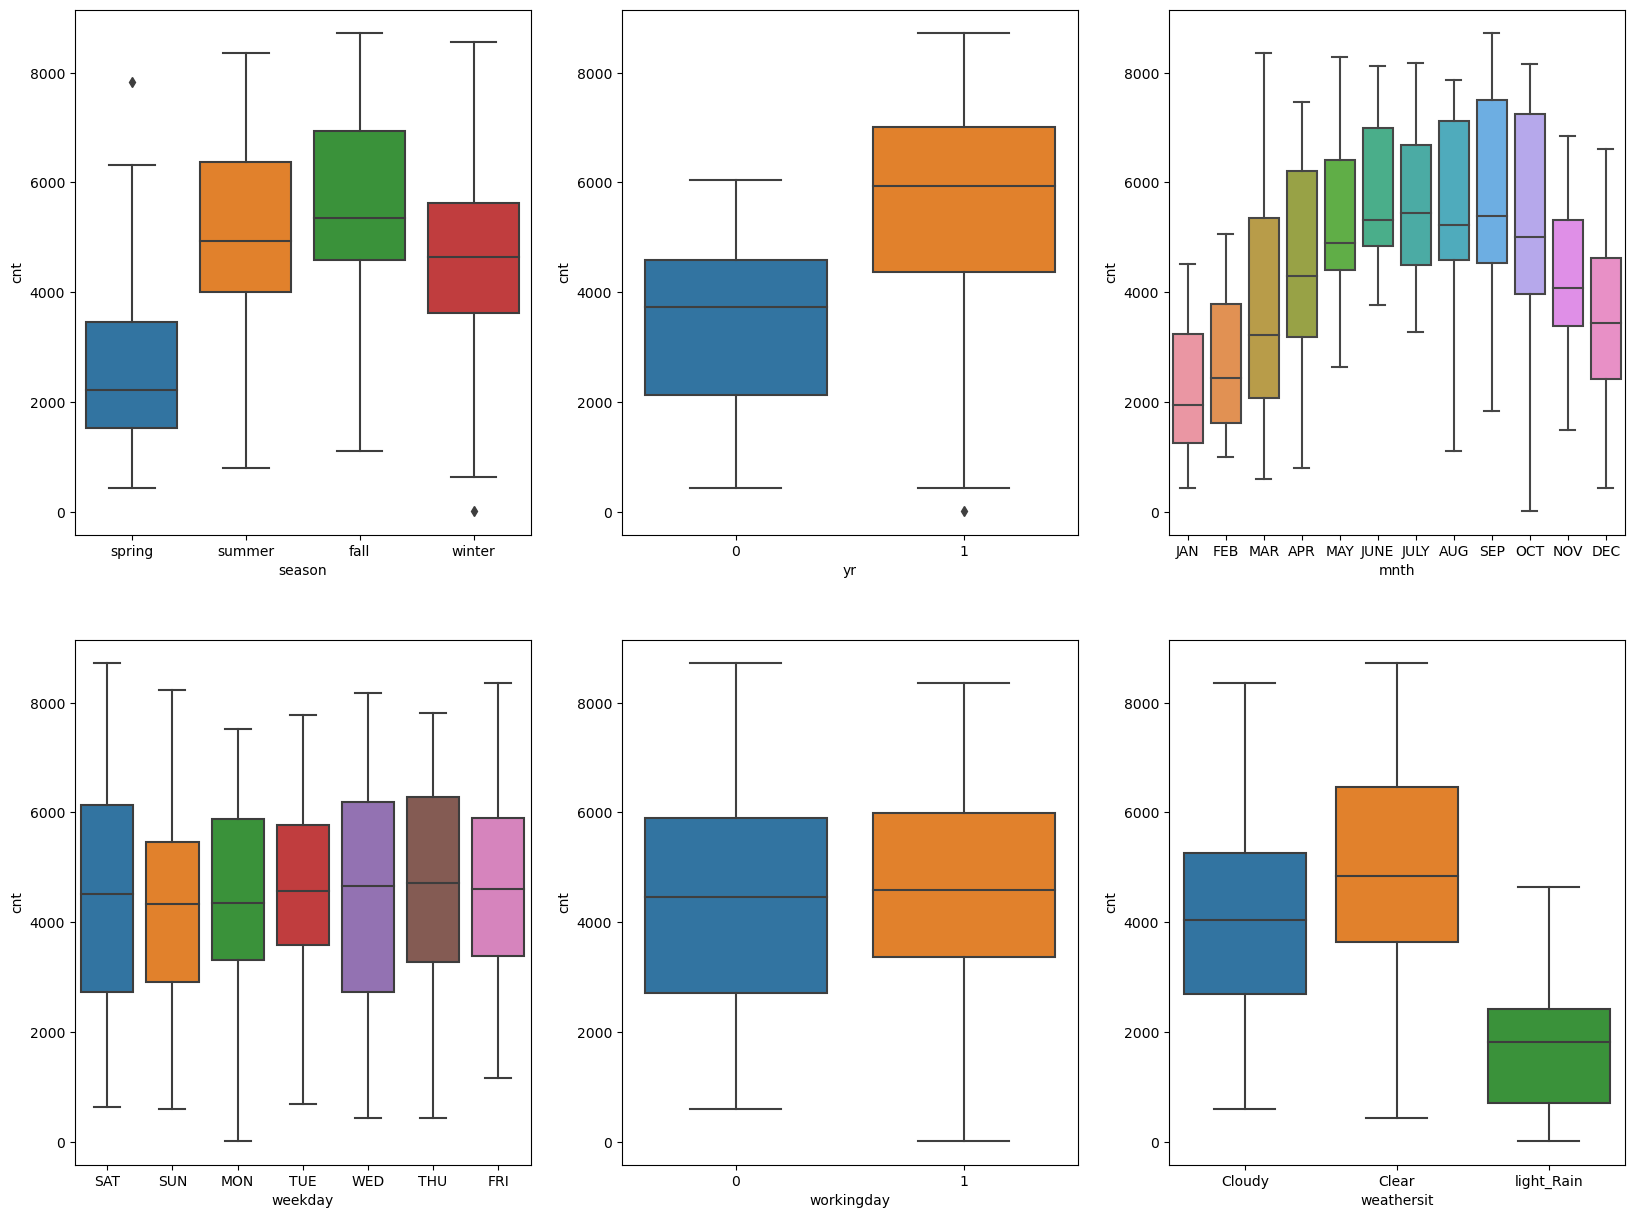

In [14]:
#visualising the categorical variables

plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=data)

plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=data)

plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=data)

plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=data)

plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=data)

plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=data)

#### Assignment Answer Number 3

<Figure size 1500x3000 with 0 Axes>

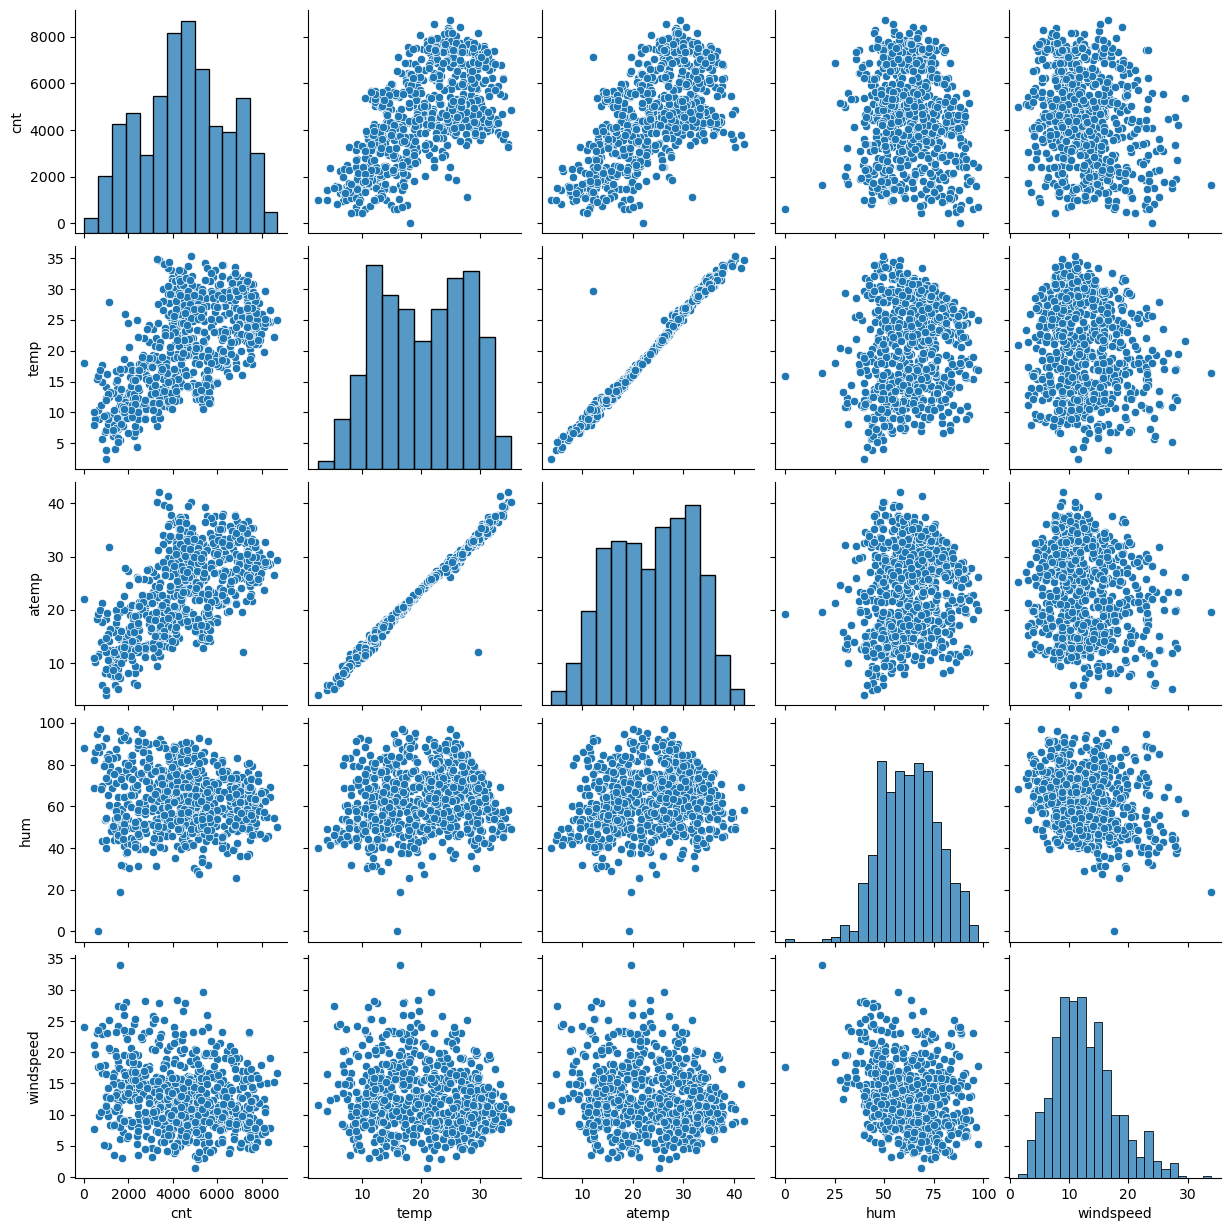

In [15]:
plt.figure(figsize = (15,30))
sns.pairplot(data=data,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

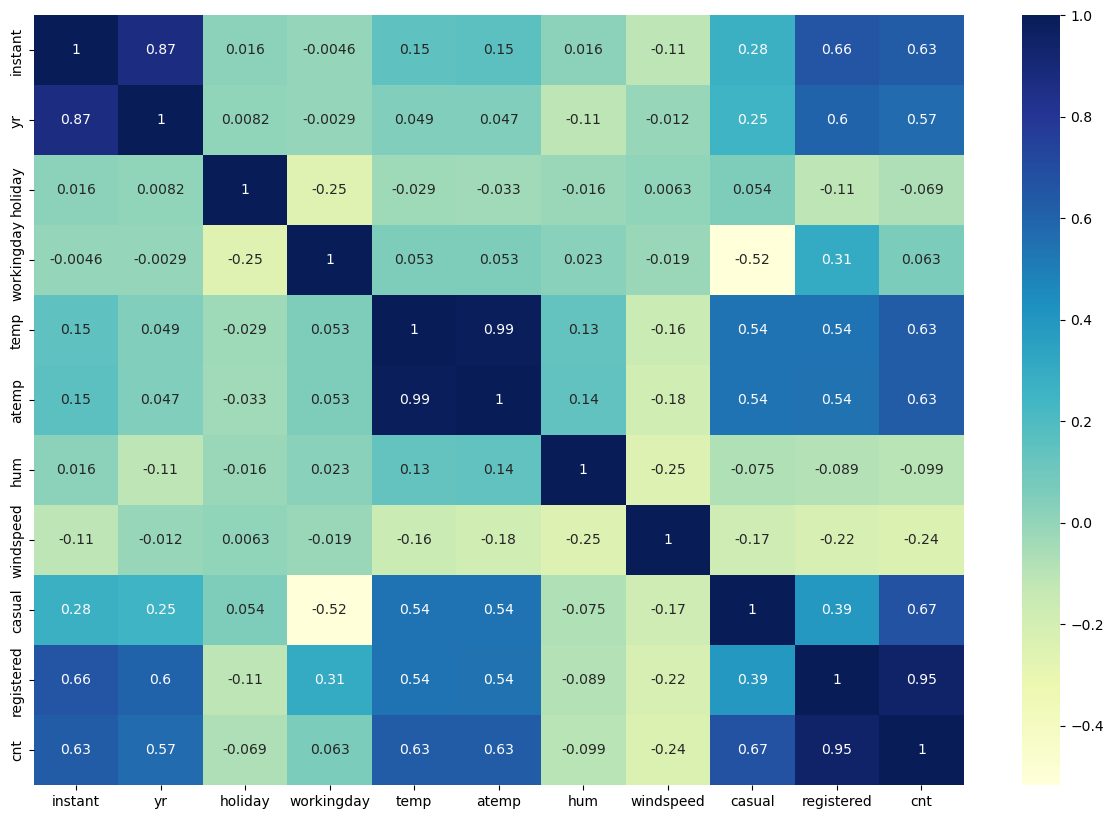

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)
plt.show()

##### Dropping the unnecssary columns

In [17]:
data.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

### Data Preparation for Modeling

In [18]:
#Dummy variable creation for mnth, weekday, weathersit and season variables.

months_data=pd.get_dummies(data.mnth,drop_first=True)
weekdays_data=pd.get_dummies(data.weekday,drop_first=True)
weathersit_data=pd.get_dummies(data.weathersit,drop_first=True)
seasons_data=pd.get_dummies(data.season,drop_first=True)

In [19]:
#Merging the dataframe, with the dummy variable dataset. 

data_new = pd.concat([data,months_data,weekdays_data,weathersit_data,seasons_data],axis=1)

In [20]:
#dropping unnecessary columns as we have already created dummy variable out of it.

data_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [21]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   AUG         730 non-null    uint8  
 9   DEC         730 non-null    uint8  
 10  FEB         730 non-null    uint8  
 11  JAN         730 non-null    uint8  
 12  JULY        730 non-null    uint8  
 13  JUNE        730 non-null    uint8  
 14  MAR         730 non-null    uint8  
 15  MAY         730 non-null    uint8  
 16  NOV         730 non-null    uint8  
 17  OCT         730 non-null    uint8  
 18  SEP         730 non-null    uint8  
 19  MON         730 non-null    u

##### Spliting the data into train and test

In [22]:
# splitting the dataframe into Train and Test into 70 and 30 

np.random.seed(0)
data_train, data_test = train_test_split(data_new, train_size = 0.7, random_state = 100)

In [23]:
data_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,AUG,DEC,...,SAT,SUN,THU,TUE,WED,Cloudy,light_Rain,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,1,0,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,1,0,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,1,0,0,1,0


In [24]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
scaler = MinMaxScaler()
num_vars = ['temp','atemp','hum','windspeed','cnt']
data_train[num_vars] = scaler.fit_transform(data_train[num_vars])

##### Building the first linear Model

In [26]:
y_train = data_train.pop('cnt')
X_train = data_train





In [27]:
X_train.shape

(510, 29)

#### Build model using RFE

##### There are 29 variables in the data sets. Let us bulid a model and try to reduce number of variables to 20 in basis of importance

In [28]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [29]:
#Cut down number of features to 20 using automated approach
rfe = RFE(lr,  n_features_to_select=20)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [30]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('AUG', True, 1),
 ('DEC', False, 2),
 ('FEB', False, 5),
 ('JAN', False, 8),
 ('JULY', True, 1),
 ('JUNE', False, 6),
 ('MAR', True, 1),
 ('MAY', True, 1),
 ('NOV', True, 1),
 ('OCT', False, 10),
 ('SEP', True, 1),
 ('MON', False, 3),
 ('SAT', True, 1),
 ('SUN', True, 1),
 ('THU', False, 9),
 ('TUE', False, 4),
 ('WED', False, 7),
 ('Cloudy', True, 1),
 ('light_Rain', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [31]:
##Top 20 features selected by RFE
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'AUG', 'JULY', 'MAR', 'MAY', 'NOV', 'SEP', 'SAT', 'SUN', 'Cloudy',
       'light_Rain', 'spring', 'summer', 'winter'],
      dtype='object')

In [32]:
X_train_final = X_train[['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'AUG', 'JULY', 'MAR', 'MAY', 'NOV', 'SEP', 'SAT', 'SUN', 'Cloudy',
       'light_Rain', 'spring', 'summer', 'winter']]

In [33]:
X_train_final.shape

(510, 20)

#### It is clear from the pair plot graph that  data has multicollinearity problems. Let us try to drop all those column first where vif is high

In [34]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [35]:
#define response variable
y = y_train

#define predictor variables
x = X_train_final

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model_new = sm.OLS(y, x).fit()

In [36]:
calculateVIF(X_train_final)

,Features,VIF
2,workingday,61.05
3,temp,59.21
4,atemp,54.23
13,SAT,14.72
14,SUN,13.96
17,spring,8.24
18,summer,6.50
19,winter,6.22
1,holiday,3.37
7,AUG,3.17


In [37]:
# We can drop working day variable as it has high vif
X_train_final1 = X_train_final.drop(['workingday'], axis = 1)
#define response variable
y = y_train

#define predictor variables
x = X_train_final1

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model_new = sm.OLS(y, x).fit()

model_new.summary()
calculateVIF(X_train_final1)

,Features,VIF
2,temp,386.63
3,atemp,371.28
4,hum,30.62
17,summer,5.88
16,spring,5.75
18,winter,5.61
5,windspeed,5.13
6,AUG,3.11
7,JULY,2.73
14,Cloudy,2.31


In [38]:
# We can drop atemp or temp day variable as it has high vif
X_train_final2 = X_train_final1.drop(['atemp'], axis = 1)
#define response variable
y = y_train

#define predictor variables
x = X_train_final2

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model_new = sm.OLS(y, x).fit()

model_new.summary()
calculateVIF(X_train_final2)

,Features,VIF
3,hum,30.52
2,temp,18.59
16,summer,5.82
15,spring,5.72
17,winter,5.53
4,windspeed,4.90
5,AUG,3.08
6,JULY,2.73
13,Cloudy,2.31
10,SEP,2.12


In [39]:
# We can drop hum day variable as it has high vif
X_train_final3 = X_train_final2.drop(['hum'], axis = 1)
#define response variable
y = y_train

#define predictor variables
x = X_train_final3

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model_new = sm.OLS(y, x).fit()

print(model_new.summary())
print(calculateVIF(X_train_final3))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     155.6
Date:                Mon, 12 Feb 2024   Prob (F-statistic):          2.31e-185
Time:                        10:34:38   Log-Likelihood:                 511.31
No. Observations:                 510   AIC:                            -986.6
Df Residuals:                     492   BIC:                            -910.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2074      0.033      6.301      0.0

#### Dropping the variable AUG, JUL, MAY, NOV, SAT as it has vey high p values.

##### Using Vif we have dropper 3 variables from features and 5 varibles using p values of models


In [40]:
# We can drop hum day variable as it has high vif
X_train_final4 = X_train_final3.drop(['AUG','JULY','MAY','NOV','SAT'], axis = 1)
#define response variable
y = y_train

#define predictor variables
x = X_train_final4

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model_new = sm.OLS(y, x).fit()

print(model_new.summary())
print(calculateVIF(X_train_final4))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.1
Date:                Mon, 12 Feb 2024   Prob (F-statistic):          8.29e-189
Time:                        10:34:38   Log-Likelihood:                 505.86
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     497   BIC:                            -930.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2007      0.029      6.895      0.0

We can cosider the above model. as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.
F-Statistics value of 217.1 (which is greater than 1) and the p-value of 8.29e-189 i.e almost equals to zero, states that the overall model is significant

#### Residual Analysis

In [41]:
X_train_final4.head()

,yr,holiday,temp,windspeed,MAR,SEP,SUN,Cloudy,light_Rain,spring,summer,winter
576,1,0,0.815169,0.264686,0,0,0,0,0,0,0,0
426,1,0,0.442393,0.255342,1,0,0,1,0,1,0,0
728,1,0,0.245101,0.663106,0,0,1,0,0,1,0,0
482,1,0,0.395666,0.188475,0,0,0,1,0,0,1,0
111,0,0,0.345824,0.380981,0,0,0,1,0,0,1,0


In [42]:
model_new.params

const         0.200716
yr            0.233977
holiday      -0.100963
temp          0.475597
windspeed    -0.150688
MAR           0.027932
SEP           0.089142
SUN          -0.048468
Cloudy       -0.080692
light_Rain   -0.292247
spring       -0.062766
summer        0.057911
winter        0.095969
dtype: float64

In [65]:
y_pred = model_new.predict(x)

In [66]:
r2 = r2_score(y, y_pred)
round(r2,2)

0.84

In [67]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_train_final4.shape[0]-1)/(X_train_final4.shape[0]-X_train_final4.shape[1]-1),2)
print(adjusted_r2)

0.84


Text(0.5, 0, 'Errors')

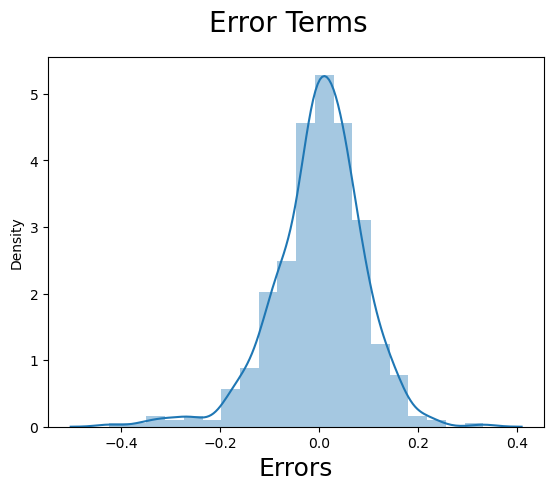

In [44]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

This graph shows that error terms are following normal distribution

Multi Colinearity

In [45]:
calculateVIF(X_train_final4)

,Features,VIF
3,windspeed,4.61
2,temp,3.91
9,spring,2.21
0,yr,2.07
10,summer,1.96
11,winter,1.66
7,Cloudy,1.55
4,MAR,1.29
5,SEP,1.23
6,SUN,1.18


Homoscedasticity

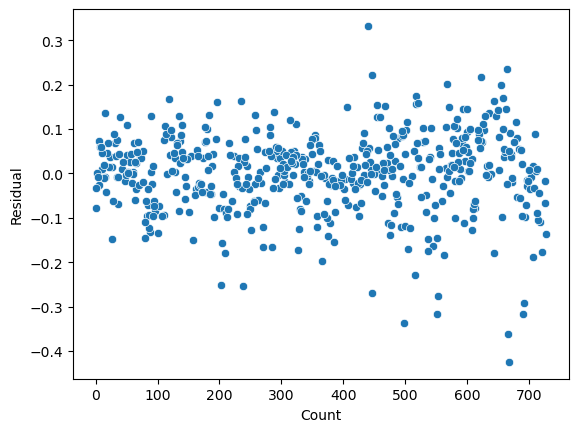

In [46]:
residual = y - y_pred
sns.scatterplot(residual)
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible patter there also

#### Making Predictions Using the Final Model

In [47]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
data_test[num_vars] = scaler.transform(data_test[num_vars])
data_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,AUG,DEC,...,SAT,SUN,THU,TUE,WED,Cloudy,light_Rain,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,1,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [48]:
y_test = data_test.pop('cnt')
X_test = data_test

In [49]:
# Adding constant variable to test dataframe
col1 = X_train_final4.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [50]:
y_pred = model_new.predict(X_test)

In [51]:
r2 = r2_score(y_test, y_pred)
round(r2,2)

0.81

Text(0, 0.5, 'y_pred')

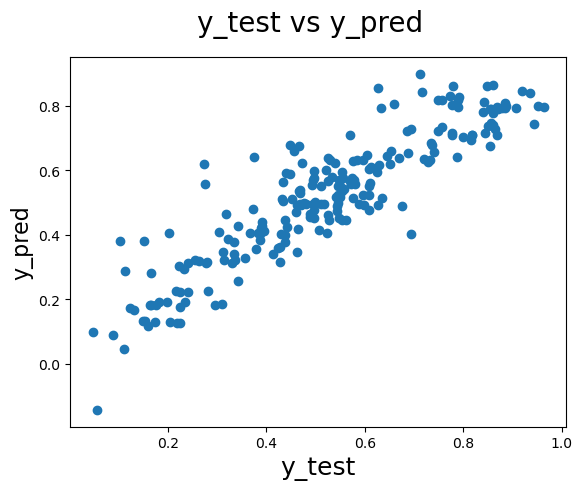

In [52]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [53]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),2)
print(adjusted_r2)

0.8


In [54]:
X_test.head()

,const,yr,holiday,temp,windspeed,MAR,SEP,SUN,Cloudy,light_Rain,spring,summer,winter
184,1.0,0,1,0.831783,0.084219,0,0,0,1,0,0,0,0
535,1.0,1,0,0.901354,0.153728,0,0,0,0,0,0,1,0
299,1.0,0,0,0.511964,0.334206,0,0,0,1,0,0,0,1
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,0,0,0,0,0,1,0


Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.84
- Test dataset R^2           : 0.81
- Train dataset Adjusted R^2 : 0.84  
- Test dataset Adjusted R^2  : 0.80

#### Demand of bikes depend on year, holiday,temp, windspeed, MAR,SEP, SUN, Cloudy, light_rain summer and winter